<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

## __Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



In [120]:
#Datos
#carro1
x0=0
v01=0
a1=6 #m/s^2
t01=0 #s
#carro2
t02= 10 #s despues del primero 
v02=10 #m/s
a2=10 #m/s

In [121]:
#1Defina un polinomio para el movimiento con aceleración uniforme
#se define una lista de coef de mayor a menor grado para el primer auto 
coef=[0.5*a1,v01-a1*t01,x0-v01*t01+0.5*a1*t01**2]
# Creamos el objeto polinomial
p1 = np.poly1d(coef)
print(p1)

   2
3 x


In [122]:
#se define una lista de coef de mayor a menor grado para el segundo auto 
coef=[0.5*a2,v02-a2*t02,x0-v02*t02+0.5*a2*t02**2]
# Creamos el objeto polinomial
p2 = np.poly1d(coef)
print(p2)


   2
5 x - 90 x + 400


In [123]:
get_ipython().run_line_magic('matplotlib', 'inline')
#Resolviendo el problema de los dos autos 
p3=p2-p1
#usaré el método roots que me da las respuestas que cumplen la 
#nueva ecuacion que se obtiene de igualar las x de los dos autos 
#hallando así los tiempos donde se encuentran 
tiempos=p3.roots
Distancias=np.array([p1(40),p2(5)])

In [124]:
# Mostrando los resultados en  markdown
from IPython.display import Markdown
respuesta = '''
Los tiempos en los que los dos carros se encuentran son: {} s y {} s.

Las distancias recorridas por los dos carros  respectivamente en esos  momentos son: {} m y {} m.
'''.format(tiempos[1],tiempos[0], Distancias[1], Distancias[0])

Markdown(respuesta)


Los tiempos en los que los dos carros se encuentran son: 5.0 s y 40.0 s.

Las distancias recorridas por los dos carros  respectivamente en esos  momentos son: 75.0 m y 4800.0 m.


## __Activity__: For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.




In [125]:
import matplotlib.pylab as plt
import scipy.optimize as opt
import scipy as sc
import matplotlib.pylab as plt 
import numpy as np
from scipy import interpolate

In [126]:
x=np.linspace(-np.pi/4,np.pi/4,10)
foriginal=np.tan(x)

In [127]:
f = interpolate.interp1d(x, foriginal)

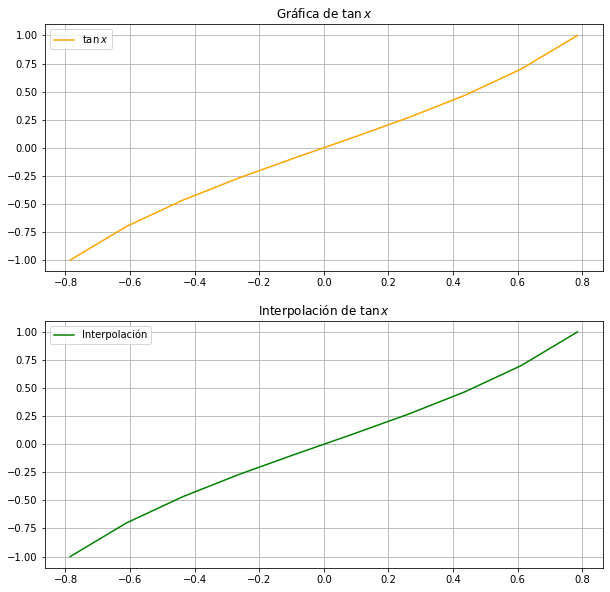

In [128]:
#Graficando la Función original y la interpolación 
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(x,foriginal,label="$\\tan x$",color='orange')
plt.legend()
plt.grid()
plt.title('Gráfica de $\\tan x$')
plt.subplot(2,1,2)
plt.plot(x,f(x),label="Interpolación",color='green')
plt.legend()
plt.title('Interpolación de $\\tan x$')
plt.grid()


Explorando  el comportamiento del algoritmo de interpolación lineal al variar la cantidad de datos utilizados.

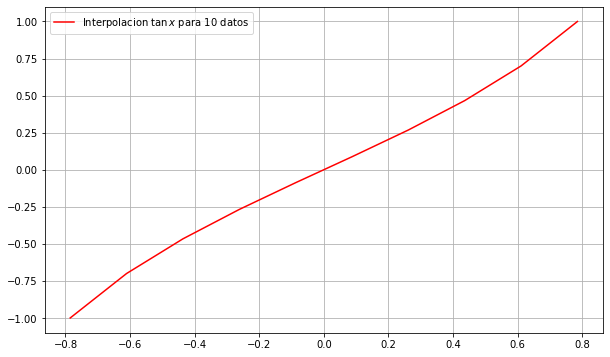

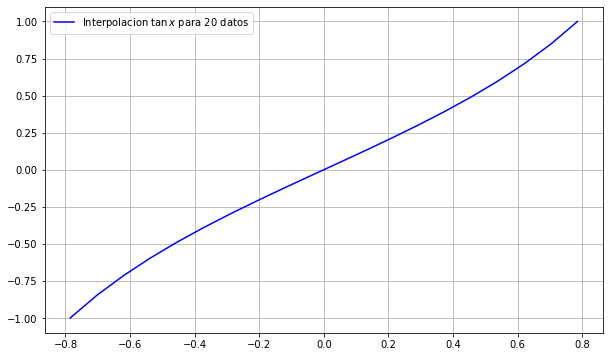

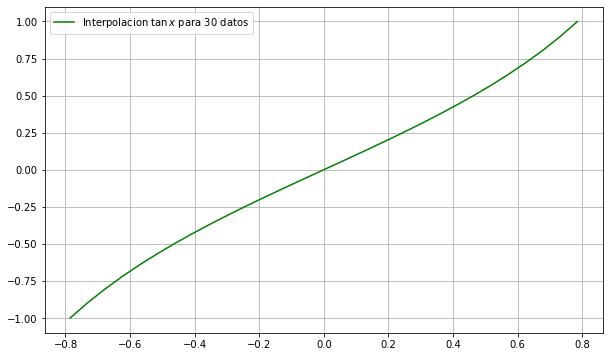

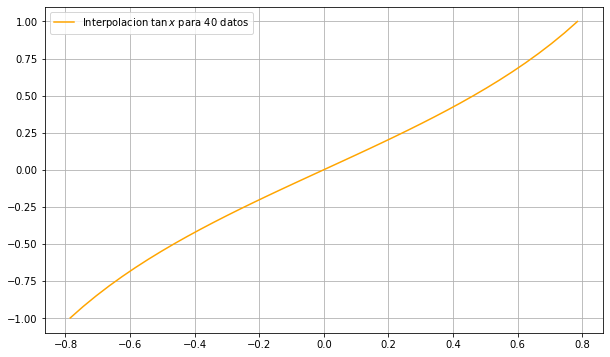

In [129]:
colors = ['red', 'blue', 'green', 'orange', 'purple'] # lista de colores
u=0
for i in range(10,50,10):
  X=np.linspace(-np.pi/4,np.pi/4,i)
  Y=np.tan(X)
  interpolation=interpolate.interp1d(X,Y)
  fig = plt.figure(figsize=(10, 6))
  plt.plot(X,interpolation(X),color=colors[u] ,label=f'Interpolacion $\\tan x$ para {i} datos ')
  u+=1
  plt.grid(True)
  plt.legend()

Es posible ver que a medida que la cantidad de datos usados aumenta ,la interpolación es más precisa con respecto a la función original $\tan{x}$ y es una curva más suave.

## __Activity__: Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

In [130]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pylab as plt 
import pandas as pd 
x = np.array([1, 1.3, 1.6, 1.9, 2.2])
fx = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
#Definimos Dataframe a partir de los arreglos x y fx
dtf=pd.DataFrame({'x':x,'y':fx})
L=lagrange(dtf['x'],dtf['y'])
#lagrange nos retorna un objeto numpy poly1d al cual se le puede extraer más 
#información como raices y coeficientes y representa la productoria 
#L.order

#Se define fx_ que es un array de la interpolación evaluada en x para graficarla
fx_=L(x)

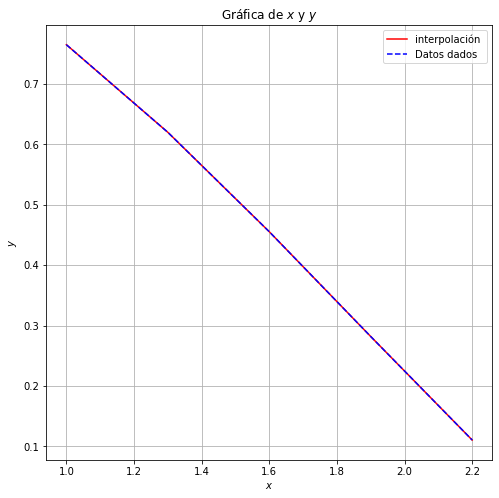

In [131]:
plt.figure(figsize=(8,8))
plt.plot(x,fx_,color='red',label='interpolación ')
plt.plot(x,fx,linestyle='--',color='blue',label='Datos dados ')
plt.title('Gráfica de $x$ y $y$')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)
plt.legend()

Se puede concluir que la interpolación si corresponde con los datos dados.

## __Activity__: Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)
1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

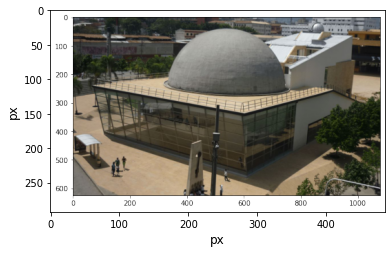

In [132]:
#1 
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pylab as plt

url = "https://drive.google.com/uc?id=1JsGX80SRgaBtuQiXs6emlBVfR8wgXQDw"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
planetario = np.array(img)
plt.imshow(planetario)
plt.xlabel('px',size=12)
plt.ylabel('px',size=12)
plt.show()


In [133]:
#2 .Puntos situados en la superficie del domo
x_=np.array([169.9,174.8,182.6,190.5,204.2,220.9,249.3,285.5,306.1,324.7,337.5,341.4])
y_=np.array([100.4,86.7,69.1,57.6,44.6,33.8,26.9,32.8,42.6,62.2,89.6,112.2])

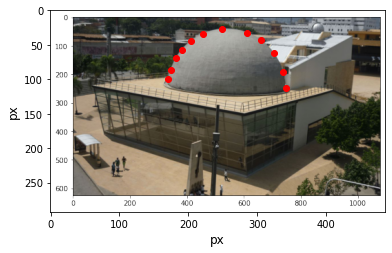

In [134]:
#Representación de los puntos en el domo
plt.imshow(img)
plt.plot(x_,y_,'ro')
plt.xlabel('px',size=12)
plt.ylabel('px',size=12)
plt.show()

In [135]:
#3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.
f = lagrange(x_,y_)

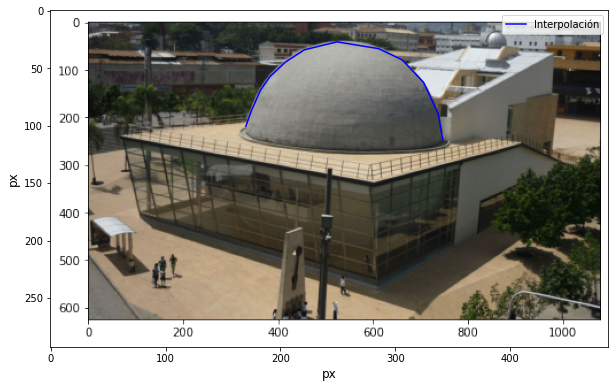

In [136]:
#Graficando la interpolación 
plt.figure(figsize=(10,10))
plt.plot(x_,f(x_),color='blue',label='Interpolación')
plt.imshow(planetario)
plt.xlabel('px',size=12)
plt.ylabel('px',size=12)
plt.legend()

In [137]:
#4 interpolation_spline_
#El objetivo es encontrar los si entre dos puntos, tal que s_i tiene grado tres 
#garantiza la continuidad entre el polinomio del primer par de puntos 

In [138]:
from scipy.interpolate import  CubicSpline

In [139]:
Int_spline=CubicSpline(x_,y_)

Text(0.5, 1.0, 'Gráfica de interpolación mediante Splines cúbicos ')

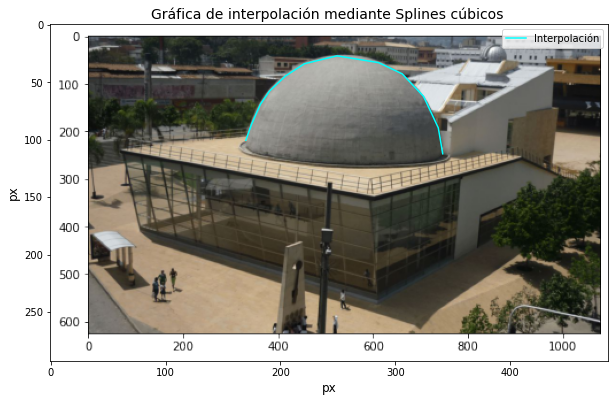

In [140]:
#Graficando la interpolación mediante splines cúblicos 
plt.figure(figsize=(10,10))
plt.plot(x_,Int_spline(x_),color='cyan',label='Interpolación')
plt.imshow(planetario)
plt.xlabel('px',size=12)
plt.ylabel('px',size=12)
plt.legend(loc=1)
plt.title('Gráfica de interpolación mediante Splines cúbicos ',size=14)

Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

A partir de las imágenes se puede ver que las interpolaciones son muy similares y presentan ciertas oscilaciones (lo que hacen que la forma del Domo no sea muy circular como la de la imagen) ya que la interpolación es un método para encontrar una función que pase por un conjunto de puntos dados y entre los puntos no hay información .

Debido a la cantidad de datos tomados la curva no es suave.Un método para solucionar esto sería aumentar los puntos y así la  interpolación se ajustaría mejor a la forma del domo.